# Lab 2.02 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [5]:
import pandas
import seaborn
import numpy

persistence = pandas.read_csv("https://raw.githubusercontent.com/developer0108/dataScience/main/data/android_persistence_cpu.csv", sep=";")
persistence = persistence.astype({"PersistenceType": "category", "DataSize" : "category"})
print(persistence.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Time             300 non-null    float64 
 1   PersistenceType  300 non-null    category
 2   DataSize         300 non-null    category
dtypes: category(2), float64(1)
memory usage: 3.4 KB
None


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

<Axes: xlabel='PersistenceType', ylabel='Time'>

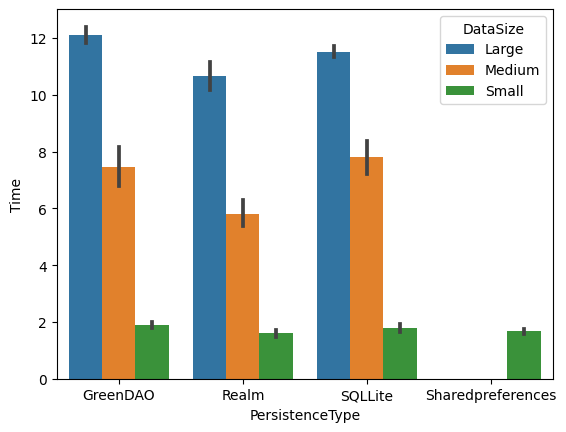

In [11]:
seaborn.barplot(data=persistence, y="Time", x="PersistenceType", hue="DataSize")

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

   DataSize    PersistenceType  Frequency
0     Large           GreenDAO         30
1     Large              Realm         30
2     Large            SQLLite         30
3     Large  Sharedpreferences          0
4    Medium           GreenDAO         30
5    Medium              Realm         30
6    Medium            SQLLite         30
7    Medium  Sharedpreferences          0
8     Small           GreenDAO         30
9     Small              Realm         30
10    Small            SQLLite         30
11    Small  Sharedpreferences         30


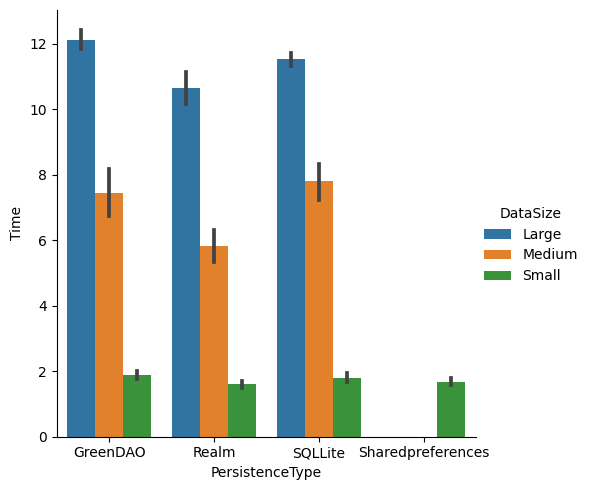

In [24]:
frequencies = persistence.groupby(["DataSize", "PersistenceType"]).size().reset_index(name="Frequency")
print(frequencies)

seaborn.catplot(data=persistence, x="PersistenceType", hue="DataSize", y="Time", kind="bar")

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time', ylabel='DataSize'>

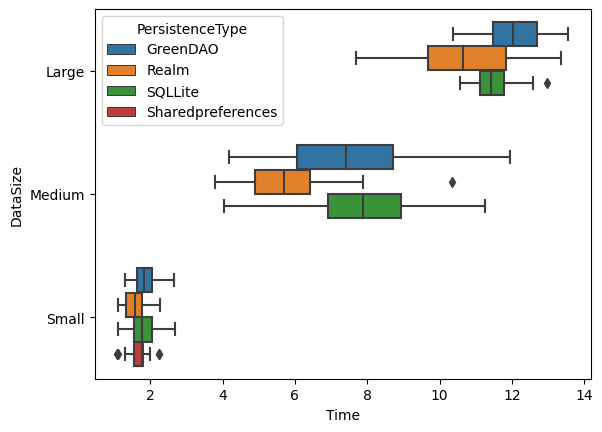

In [31]:
seaborn.boxplot(data=persistence, x="Time", y="DataSize", hue="PersistenceType")

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

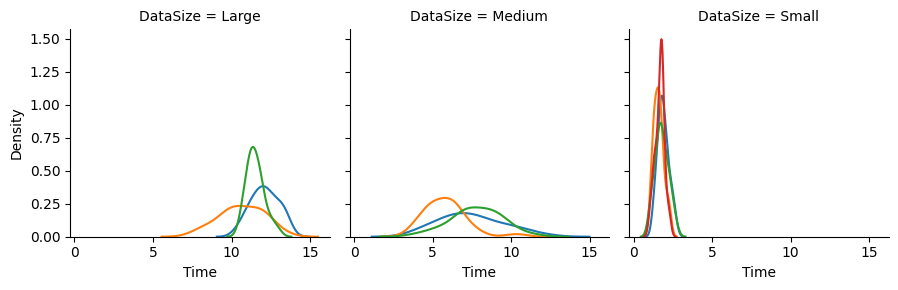

In [79]:
grid = seaborn.FacetGrid(data=persistence, col="DataSize", hue="PersistenceType")
grid.map(seaborn.kdeplot, "Time")

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [109]:
dataSize = persistence.DataSize.unique() 
persistenceTypes = persistence["PersistenceType"].unique()

for size in dataSize:
    print(f"Mean for {size}: {persistence[persistence['DataSize'] == size]['Time'].mean().round(3)}")
    print(f"standard deviation for {size}: {persistence[persistence['DataSize'] == size]['Time'].std().round(3)}")

for persistenceType in persistenceTypes:
    print(f"Mean for {persistenceType}: {persistence[persistence['PersistenceType'] == persistenceType]['Time'].mean().round(3)}")
    print(f"standard deviation for {persistenceType}: {persistence[persistence['PersistenceType'] == persistenceType]['Time'].std().round(3)}")

for size in dataSize:
    for persistenceType in persistenceTypes:
        print(f"Mean for {size} and {persistenceType}: {round(persistence[(persistence['DataSize'] == size) & (persistence['PersistenceType'] == persistenceType)]['Time'].mean(), 3)}")
        print(f"standard deviation for {size} and {persistenceType}: {round(persistence[(persistence['DataSize'] == size) & (persistence['PersistenceType'] == persistenceType)]['Time'].std(), 3)}")




Mean for Small: 1.741
standard deviation for Small: 0.359
Mean for Medium: 7.022
standard deviation for Medium: 1.864
Mean for Large: 11.426
standard deviation for Large: 1.164
Mean for Sharedpreferences: 1.674
standard deviation for Sharedpreferences: 0.285
Mean for GreenDAO: 7.153
standard deviation for GreenDAO: 4.386
Mean for SQLLite: 7.036
standard deviation for SQLLite: 4.146
Mean for Realm: 6.023
standard deviation for Realm: 3.884
Mean for Small and Sharedpreferences: 1.674
standard deviation for Small and Sharedpreferences: 0.285
Mean for Small and GreenDAO: 1.894
standard deviation for Small and GreenDAO: 0.348
Mean for Small and SQLLite: 1.799
standard deviation for Small and SQLLite: 0.416
Mean for Small and Realm: 1.599
standard deviation for Small and Realm: 0.315
Mean for Medium and Sharedpreferences: nan
standard deviation for Medium and Sharedpreferences: nan
Mean for Medium and GreenDAO: 7.454
standard deviation for Medium and GreenDAO: 2.007
Mean for Medium and SQLLi

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
